# <font color ='blue'>Laboratorio 1

In [76]:
import numpy as np
import random
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import astropy.io.ascii as ascii
from scipy.stats import norm,cauchy

## Exercise 01.1

    

Nell' esercizio vogliamo verificare il corretto funzionamento del generatore di numeri casuali.

Il primo obbiettivo è stato quello di calcolare il valore dell'integrale $\langle r \rangle = \int_0^1 r dr = 1/2$ mediante l'utilizzo del  generatore di numeri casuali, sfruttando la tecnica del data-blocking.
IL valore dell' integrale è stato calcolato su $N$ = 100 blocchi, con $M$= 10^4 tiri in ciascuno.

Di seguito sono riportati i grafici ottenuti dallo studio del valore statistico dell' integrale

### a) Valore medio

Viene verificata la convergenza dell'integrale $\langle r \rangle = \int_0^1 r dr$  a $1/2$ , dove *r* è un numero pseudocasuale nell' intervallo tra [0,1)

Nel grafico è ilustrato il valore della media progressiva in funzione del numero di blocchi $N$. Come atteso il valore della media converge al valore analitico, con errore progressivamente descrescente (in accordo con il `Teorema del Limite Centrale`)

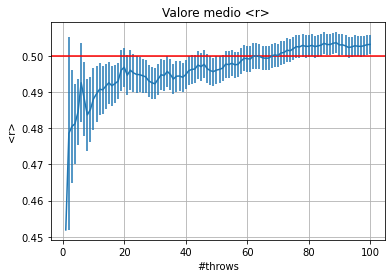

In [18]:
#===== Grafico Valori Medi ======
x, f, error = np.loadtxt("Ex-1/Es1/Ave.dat", usecols=(0,1,2), delimiter=None, unpack='true')
plt.errorbar(x,f ,yerr=error)
plt.xlabel('#throws')
plt.title("Valore medio <r> ")
plt.ylabel('<r>')
plt.grid(True)
plt.axhline(y=0.5, color = 'r', linestyle = '-')
plt.show()

### b) Deviazione Standard della Media
 
 Verifica della convergenza della deviazione standard della Media  $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Il metodo utilizzato è analogo a quello usato per il calcolo del valore medio e della sua incertezza.
 Il valore statistico è stato calcolato mediante Data-blocking con $N$ = 100 e il numero di lanci in ciascun blocco è $M$ = 10000.

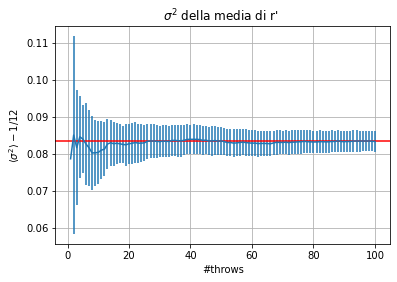

In [19]:
#===== Grafico Deviazione standard ======
x, f, error = np.loadtxt("Ex-1/Es1/Dev.dat", usecols=(0,1,2), delimiter=None, unpack='true')
plt.errorbar(x,f ,yerr=error)
plt.xlabel('#throws')
plt.title("$\sigma^2$ della media di r'  ")
plt.ylabel(r'$\langle \sigma^2 \rangle-1/12$')
plt.grid(True)
plt.axhline(y=1./12., color = 'r', linestyle = '-')
plt.show()

Si osserva che la STD converge a 1/12

### 3) Test del $\chi^2$

Viene implementato il test del  $\chi^2$ per verificare che la correlazione presente tra i numeri (pseudo)casuali sia trascurabile nelle nostre considerazioni. 
Divido quindi$[0,1]$ in $N$ = 100 intervalli identici, da $M$ = $10^4$ numeri ciascuno, e implemento il test del $\chi^2$.
In seguito è stato calcolato il valore di $\chi^2$ secondo la formula:
$$\chi^2 = \sum_{i=1}^N \frac{\left( M_i - M/N \right)^2}{M/N}$$
dove $M_i$ è il numero di punti caduti nell'intervallo i-esimo.

Siccome ci aspettiamo in media che $(M_i - M/N)^2 \simeq M/N$, di conseguenza $\chi^2 \simeq 100$ ( ovvero il numero di sottonitervalli utilizzati $N$)



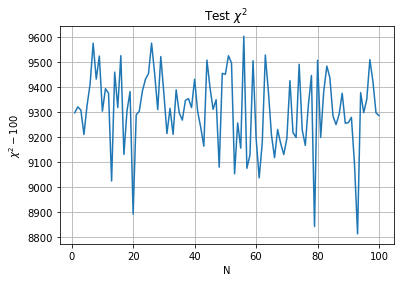

In [20]:
#===== Grafico Chi^2 ======
x, f= np.loadtxt("Ex-1/Es1/Chi.dat", usecols=(0,1), delimiter=None, unpack='true')
plt.plot(x,f)
plt.xlabel('N')
plt.title("Test $\chi^2$ ")
plt.ylabel("$\chi^2 - 100$")
plt.grid(True)
#plt.axhline(y=1./12., color = 'r', linestyle = '-')
plt.show()

Si deduce quindi che la pseudo-randomicità dei numeri generati non è stata rivelata dai test eseguiti; questo implica che possiamo considerare il generatore come un generatore di numeri casuali

## Exercise 01.2

Nell'esercizio sono state estese le funzionalità del generatore di numeri pseudo-casuali, verificando in seguito la validità del teorema del limite Centrale.

Sono state aggiunte alla classe  `Random ` due funzioni che permettono di estrarre numeri con una distribuzione di probabilità specifica: 
- Distribuzione esponenziale : $p(x) = \lambda \exp(-\lambda x)$ con $x\in [0;+\infty]$ ( $\lambda$ sarà uguale a 1 nel nostro caso)

- Distribuzione di Cauchy-Lorentz: $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ con $x\in [-\infty;+\infty]$, con $\mu = 0$ e $\Gamma = 1$

Le distribuzioni sono state generate usando il metodo di Inversione della Cumulativa(CDF).

L'inversione della cumulativa porta ai seguenti risultati : 
- $x =- \frac{1}{\lambda}ln(1-y)$
- $x = \Gamma \tan[\pi(y-\frac{1}{2})] + \mu$ 

dove y è uniformemente distribuito tra [0,1)

Creo tre istogrammi per ciascuna delle distribuzioni: ogni istrogramma deve contenere $10^4$ realizzazioni of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ con $N=1, 2, 10, 100$, dove $x_i$ sono stati estratti secondo la relativa distribuzione



Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

Per la Distribuzione $Uniforme$ e $Esponenziale$,mi aspetto che al crescere di N, le $S_N$ tenda a una gaussiana con media $\mu = <S_N>$ , per il teorema del limite centrale (siccome gli $x_i$ utilizzati sono indipendenti e sono stati estratti da distribuzioni con varianza finita).
Siccome la distribuzione $Lorenziana$ non ha varianza finita, non mi aspetto che questi seguano il teorema del limite centrale.

In ciascun file,relativo a una data distribuzione di $x_i$, i dati relativi a $N$ differenti sono incolonnati.

### 1) Distribuzione Uniforme

In [77]:
unif = np.loadtxt("Ex-1/Es2/Unif.dat", unpack = 'true')
N_1 = np.zeros(10000)
N_2 = np.zeros(10000)
N_10 = np.zeros(10000)
N_100 = np.zeros(10000)
N_value = [N_1,N_2,N_10,N_100]
for i in range (0,10000):
    N_1[i] = unif[i]
    N_2[i] = unif[i +10000]
    N_10[i] = unif[i + 2*10000]
    N_100[i]  = unif[i + 3*10000]

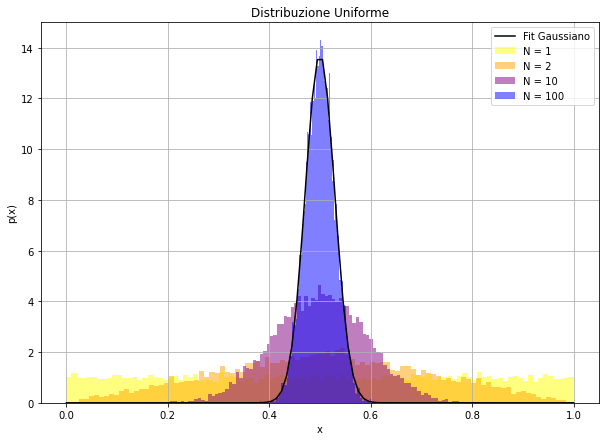

In [78]:
numero = ["1","2","10","100"]
label = [N_1,N_2,N_10,N_100]
color = ['yellow','orange','purple','blue']
label_name = ["N = 1","N = 2", "N = 10", "N = 100"]

fig=plt.figure(figsize=(10,7))
for i in range (0,4):
    plt.hist(label[i],100,density = 'true',color = color[i],alpha = 0.5,label = label_name[i])
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.title('Distribuzione Uniforme')
parameter = norm.fit(N_100)       
x = np.linspace(0, 1, 100)     
y = norm.pdf(x, *parameter)     
plt.plot(x, y, color = 'black', linestyle = '-', label = "Fit Gaussiano")
    
plt.grid(True)
plt.legend()
plt.show()


### 1) Distribuzione Esponenziale

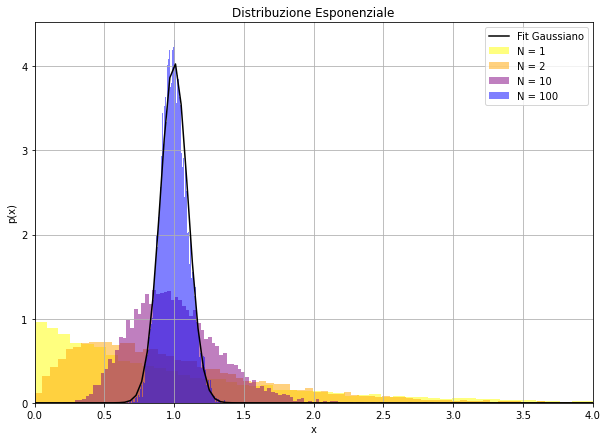

In [82]:
esp = np.loadtxt("Ex-1/Es2/Exp.dat", unpack = 'true')
N_1 = np.zeros(10000)
N_2 = np.zeros(10000)
N_10 = np.zeros(10000)
N_100 = np.zeros(10000)
N_value = [N_1,N_2,N_10,N_100]
for i in range (0,10000):
    N_1[i] = esp[i]
    N_2[i] = esp[i +10000]
    N_10[i] = esp[i + 2*10000]
    N_100[i]  = esp[i + 3*10000]
    
numero = ["1","2","10","100"]
label = [N_1,N_2,N_10,N_100]
color = ['yellow','orange','purple','blue']
label_name = ["N = 1","N = 2", "N = 10", "N = 100"]

fig=plt.figure(figsize=(10,7))
for i in range (0,4):
    plt.hist(label[i],100,density = 'true',color = color[i],alpha = 0.5,label = label_name[i])
    plt.xlabel('x')
    plt.xlim(0,4)
    plt.ylabel('p(x)')
    plt.title('Distribuzione Esponenziale')
parameter = norm.fit(N_100)       
x = np.linspace(0, 4, 100)     
y = norm.pdf(x, *parameter)     
plt.plot(x, y, color = 'black', linestyle = '-', label = "Fit Gaussiano")
    
plt.grid(True)
plt.legend()
plt.show()

### 1) Distribuzione di Cauchy

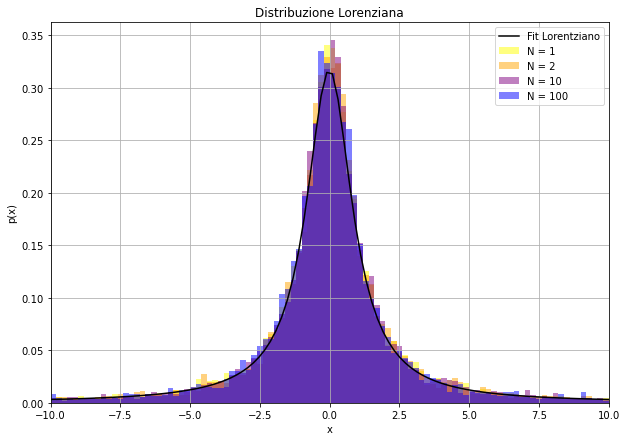

In [88]:
lor = np.loadtxt("Ex-1/Es2/Lor.dat", unpack = 'true')
N_1 = np.zeros(10000)
N_2 = np.zeros(10000)
N_10 = np.zeros(10000)
N_100 = np.zeros(10000)
N_value = [N_1,N_2,N_10,N_100]
for i in range (0,10000):
    N_1[i] = lor[i]
    N_2[i] = lor[i +10000]
    N_10[i] = lor[i + 2*10000]
    N_100[i]  = lor[i + 3*10000]
    
numero = ["1","2","10","100"]
label = [N_1,N_2,N_10,N_100]
color = ['yellow','orange','purple','blue']
label_name = ["N = 1","N = 2", "N = 10", "N = 100"]

fig=plt.figure(figsize=(10,7))
for i in range (0,4):
    plt.hist(label[i],100,range = (-10,+10),density = 'true',color = color[i],alpha = 0.5,label = label_name[i])
    plt.xlabel('x')
    plt.xlim(-10,10)
    plt.ylabel('p(x)')
    plt.title('Distribuzione Lorenziana')
    
parameter = cauchy.fit(N_100)                             
x = np.linspace(-10, 10, 100)  
y = cauchy.pdf(x, *parameter)  
plt.plot(x, y, color = 'black', linestyle = '-', label = "Fit Lorentziano")

    
plt.grid(True)
plt.legend()
plt.show()

Nelle prime casistiche è immediato notare la cnvergenza alla distribuzione normale, in accordo con il teorema del limite centrale. Analogamente è evidente come la distribuzione di Lorenza rimanga pressoche immutata. Entrambi i risultati sono coerenti con il teorema del limite centrale.

## Exercise 01.3

Calcolo del valore di $\pi$ mediante l'esperimento di Buffon.

Un ago di lunghezza $L$ viene lanciato casualmente su un piano orizzontale con righe parallele equidistanti $d$ , con $d > L$. La probabilità che l'ago intersechi una delle linee è $P = 2L/\pi d$. Per inversione è quindi possibile ricavare il valore di $\pi$ : 
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

dove $N_{thr}$ e $N_{hit}$ sono rispettivamente il numero di lanci e il numero di lanci intersecati.

Di seguito è riportato il grafico che mostra la stima del valore di $\pi$ con la relativa incertezza statistica, calcolati mediante data-blocking.
Sono stati eseguiti $M = 5 x 10^4$ ( corrispondente a $N_{thr}$) per ciascuno dei $N = 100$ blocchi.

Per eseguire la simulazione sono stati scelti i valori $d = 5$, $L = 3$.



`Metodo di risoluzione`:
- estrazione casuale di $y$ tra $[0, d]$ , il problema è infatti invariante per  traslazione. il punto estratto rappresenta il centro dell' ago.
- estrazione casuale dell'angolo $\theta$ che indica l'orientamento dell' ago rispetto all' asse verticale. é ora possibile estrarre le cordinate degli estremi dell' ago. L'angolo è stato calcolato senza utilizzare la conoscenza di $\theta$ ( Metodo utilizzto esposto in `Ex-1/Es3/main.cpp`)
$$y_{dx} = y + \frac{L}{2}sin(\theta)$$
- Verifica dell' intersezione con la retta, studiando la posizione dell'estremo

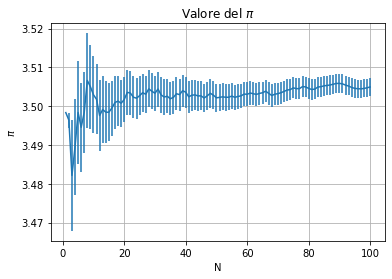

In [115]:
#===== Grafico Valori Medi ======
x, f, error = np.loadtxt("Ex-1/Es3/Pi.dat", usecols=(0,1,2), delimiter=None, unpack='true')
plt.errorbar(x,f ,yerr=error)
plt.xlabel('N')
plt.title("Valore del $\pi$")
plt.ylabel('$\pi$')
plt.grid(True)
#plt.axhline(y=math.pi, color = 'r', linestyle = '-')
plt.show()

Purtroppo non sono riuscita a far convergere l'algoritmo verso il valore vero di $\pi$. ho provato a variare i valori di $l$ e $d$, pur sempre assicurandomi di non trovvarmi nella relazione  $d\gg L$, ma non sono riuscita a ottenere il valore sperato. Anche un aumento significativo del valore di $M$ non ha variato il risultato dell' algoritmo.